In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn

%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
%matplotlib inline

In [3]:
# 2/13/17, update, using a dataframe cleaned in R. Code was first started using 
# Construction Related Claims - CY 2006 to CY 2015 (with Claimed Amount).xls spreadsheet. Started 12/2016
df = pd.read_csv('full_claims.csv', header=0, parse_dates = [9], infer_datetime_format=True)
df.columns

Index([u'ClaimNo', u'Claimant', u'Street1', u'Street2', u'CLAIMED_AMOUNT',
       u'Claim_Class', u'Year', u'BORO.adj', u'Claim_Amt.1M', u'ClaimDate',
       u'Boro', u'DeptDesc', u'CT_Des', u'SJ_DA', u'SJ_AMOUNT', u'RIS',
       u'RIS.1', u'RISK', u'RISK.1', u'RIS.2', u'RISK.2', u'RISK.3', u'RISK.4',
       u'RIS.3', u'RIS.4', u'RI', u'RIS.5', u'Boro.adj', u'Dept.adj',
       u'Agency.adj'],
      dtype='object')

In [4]:
# method to convert entire dataframe to numeric
#df= df.apply(lambda x:pd.to_numeric(x, errors='ignore'))

In [5]:
# number of nan by column
df.isnull().sum()

ClaimNo             0
Claimant            0
Street1           380
Street2           769
CLAIMED_AMOUNT    361
Claim_Class       361
Year              361
BORO.adj          373
Claim_Amt.1M      361
ClaimDate           0
Boro               19
DeptDesc          274
CT_Des              0
SJ_DA             910
SJ_AMOUNT         910
RIS                 0
RIS.1              36
RISK               57
RISK.1            379
RIS.2             775
RISK.2            865
RISK.3            892
RISK.4            899
RIS.3             902
RIS.4             908
RI                916
RIS.5             920
Boro.adj           19
Dept.adj          274
Agency.adj          0
dtype: int64

In [6]:
# fill missing, null, values with NA
#df.fillna(df.mean(), inplace=True)

In [7]:
# query rows where column F_Claimant is nan
#df.query("F_Claimant != F_Claimant")

In [8]:
# query rows where column F_Claimant is nan
#df.query("CLM_NO != CLM_NO")

In [9]:
# query rows where column BORO_ is nan
#df.query("BORO_ != BORO_")

In [10]:
# remove rows that do no have a Claimant
#df = df[pd.notnull(df['F_Claimant'])]
# remove rows that do not have Claim Number as these are just Yearly Total
#df = df[pd.notnull(df['CLM_NO'])]

In [11]:
#df = df.loc[:,'CLM_NO':'SJ_AMOU'] # get columns and assign to df
#df = df.reset_index(drop=True) # reset index 
#df = df.dropna(thresh=4) 

In [12]:
# convert CLM_OCC to date datatype
#df['CLM_OCC'] = pd.to_datetime(df['CLM_OCC'])


In [13]:
df['Year'] = pd.DatetimeIndex(df['ClaimDate']).year
df['Month'] = pd.DatetimeIndex(df['ClaimDate']).month

In [14]:
# create test and train dataframes
#df_train = df[pd.notnull(df['CLAIMED_AMOUNT'])]
#df_train = df_train.reset_index(drop=True) # reset index 
#df_test = df[np.isnan(df['CLAIMED_AMOUNT'])]
#df_test = df_test.reset_index(drop=True) # reset index 
#df_test.head()

In [15]:
### Correlation in Data
corr = df.corr()['CLAIMED_AMOUNT']
corr[np.argsort(corr, axis=0)[::-1]]

CLAIMED_AMOUNT    1.000000
Claim_Amt.1M      1.000000
Year              0.082530
Month            -0.010626
Name: CLAIMED_AMOUNT, dtype: float64

In [16]:
# df.groupby('BORO_').sum()

def classify(num):
    if num >= 10000000:
        return int(3)
    if num >= 6.000000e+06 and num < 1.000000e+07:
        return int(2)
    else:
        return int(1)

In [17]:
# use classify function on claim column
#df['Claim_Class'] = df['CLAIMED_AMOUNT'].apply(classify)

In [18]:
df.groupby('Claim_Class').mean()

,CLAIMED_AMOUNT,Year,Claim_Amt.1M,Month
Claim_Class,,,,
high,5.250798e+07,2011.121673,52.507985,6.699620
low,2.633953e+06,2010.703971,2.633953,6.559567
medium,6.675000e+06,2011.300000,6.675000,6.400000


In [19]:
# show claim amount per $100k
df['ClaimAmt_100k'] = df['CLAIMED_AMOUNT']/100000

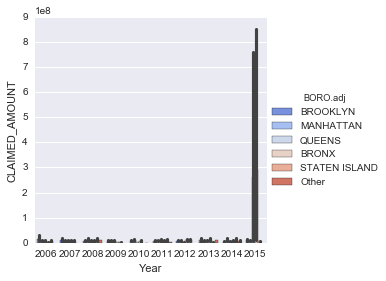

In [20]:
sns.factorplot(x='Year', y = 'CLAIMED_AMOUNT', data=df, hue='BORO.adj', palette='coolwarm', kind='bar')

In [21]:
# why wont this function change the dataframe
#def outlier(num):
#    if num in df['CLAIMED_AMOUNT']:
#        if num > 750:
#            num = df['CLAIMED_AMOUNT'].mean()
#        else:
#            num = num

In [22]:
# remove outlier of Claimed Amount over $900k and replace with mean
def outlier(num):
    if num > 900:
        return df['ClaimAmt_100k'].mean()
    else:
        return num

In [23]:
# make a 
df['Claim_Amt.adj'] = df['ClaimAmt_100k'].apply(outlier)

In [24]:
df['Claim_Amt.adj'].describe()

count    560.000000
mean      83.059085
std       78.531042
min        0.000000
25%       20.000000
50%       60.000000
75%      100.000000
max      550.000000
Name: Claim_Amt.adj, dtype: float64

In [25]:
# create histogram of adjusted claim data and log of adjusted claim amount
matplotlib.rcParams['figure.figsize'] = (6.0, 3.0)
claims = pd.DataFrame({'Claim': df['Claim_Amt.adj'], 'log(Claim+1)': np.log1p(df['Claim_Amt.adj'])})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1176209d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a43aa50>]], dtype=object)

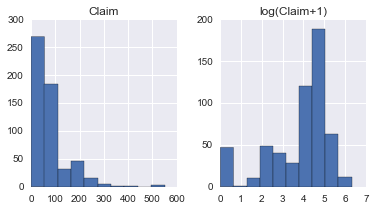

In [26]:
claims.hist()

In [27]:
# take the log of adjusted claim amount
df['ClaimAmt_logadj'] = np.log1p(df['Claim_Amt.adj'])

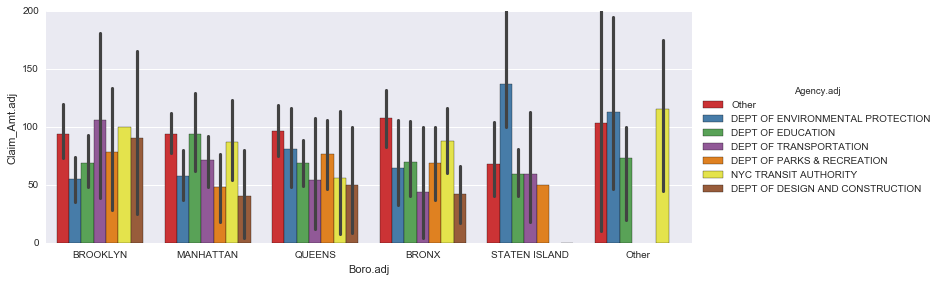

In [95]:
# bar graph of claim amount by boroughs for each city department
sns.factorplot(x='Boro.adj', y ='Claim_Amt.adj', data=df, hue='Agency.adj', palette='Set1', kind='bar', aspect=2.5).savefig('agency.png')

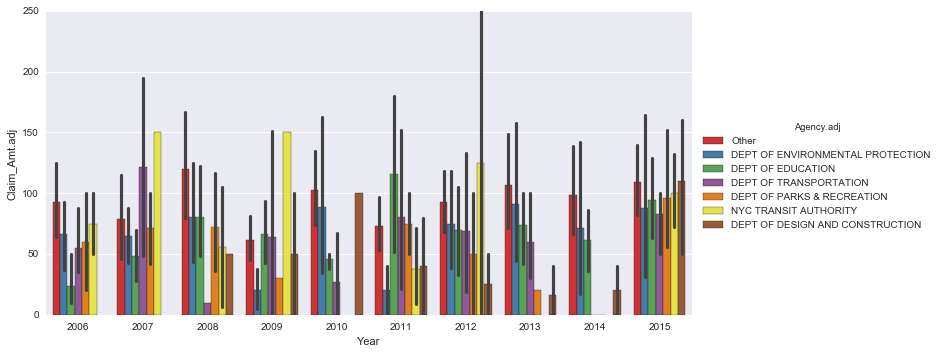

In [29]:
# bar graph of claim amount by year for each city department
year = sns.factorplot(x='Year', y ='Claim_Amt.adj', data=df, hue='Agency.adj', palette='Set1', kind='bar', aspect=2, size=5).savefig('year.png')

In [30]:
df.columns

Index([u'ClaimNo', u'Claimant', u'Street1', u'Street2', u'CLAIMED_AMOUNT',
       u'Claim_Class', u'Year', u'BORO.adj', u'Claim_Amt.1M', u'ClaimDate',
       u'Boro', u'DeptDesc', u'CT_Des', u'SJ_DA', u'SJ_AMOUNT', u'RIS',
       u'RIS.1', u'RISK', u'RISK.1', u'RIS.2', u'RISK.2', u'RISK.3', u'RISK.4',
       u'RIS.3', u'RIS.4', u'RI', u'RIS.5', u'Boro.adj', u'Dept.adj',
       u'Agency.adj', u'Month', u'ClaimAmt_100k', u'Claim_Amt.adj',
       u'ClaimAmt_logadj'],
      dtype='object')

In [31]:
# check number of columns with missing values
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

In [32]:
df[show_missing()].isnull().sum()

Street1            380
Street2            769
CLAIMED_AMOUNT     361
Claim_Class        361
BORO.adj           373
Claim_Amt.1M       361
Boro                19
DeptDesc           274
SJ_DA              910
SJ_AMOUNT          910
RIS.1               36
RISK                57
RISK.1             379
RIS.2              775
RISK.2             865
RISK.3             892
RISK.4             899
RIS.3              902
RIS.4              908
RI                 916
RIS.5              920
Boro.adj            19
Dept.adj           274
ClaimAmt_100k      361
Claim_Amt.adj      361
ClaimAmt_logadj    361
dtype: int64

In [33]:
# see null values for Boro.adj and how they relate to Dept.adj and Claim_Amt.adj
df[['Boro.adj','Dept.adj','Claim_Amt.adj']][df['Boro.adj'].isnull()==True]

,Boro.adj,Dept.adj,Claim_Amt.adj
74,NaN,NaN,200.0
111,NaN,NaN,10.0
142,NaN,DEPT OF ENVIRONMENTAL PROTECTION,200.0
176,NaN,DEPT OF EDUCATION,100.0
185,NaN,HOUSING PRESERVATION AND DEVELOPMENT,100.0
192,NaN,NYC TRANSIT AUTHORITY,150.0
372,NaN,DEPT OF EDUCATION,100.0
380,NaN,DEPT OF EDUCATION,20.0
398,NaN,DEPT OF ENVIRONMENTAL PROTECTION,350.0
477,NaN,NYC TRANSIT AUTHORITY,10.0


In [34]:
# look at missing categorical values
def cat_explore(column):
    return df[column].value_counts()

In [35]:
# imputing missing values
def cat_impute(column, value):
    df.loc[df[column].isnull(),column] = value

In [36]:
# empty fields mean no claim amount made
#cat_impute('Claim_Amt.adj','None')

In [37]:
# assign None to missing values in Boro.adj and Dept.adj
cat_impute('Boro.adj','Other')
cat_impute('Dept.adj','Other')

In [38]:
# look at Risk categories
cat_explore('Boro.adj')

MANHATTAN        299
BROOKLYN         201
BRONX            177
QUEENS           167
STATEN ISLAND     48
Other             29
Name: Boro.adj, dtype: int64

In [39]:
cat_impute('RISK','None')

In [40]:
cat_impute('RIS', 'None')

In [41]:
cat_impute('RIS.1', 'None')

In [42]:
cat_explore('RISK.1')

CITY BLDG - UNSPEC                 120
CITY BLDG - CIVIC/PUBLIC            88
FALLING OBJECT                      46
DEBRIS/GLASS                        36
CITY LOT/LAND                       23
EQUIP FAILURE/DEFECT                22
CITY BLDG - WALKS & GROUNDS         21
COLLAPSE/STRUCTURAL FAILURE         18
PRIVATE BLDG - UNSPEC               18
COLLISION/STRUCK BY                 14
PARK                                14
IMPROPER MAINTENANCE                13
SLIP/FALL                           10
FLOOR/SURFACE - WET/SLIPPERY         9
CITY AGENCY/OFFICE                   9
FLOOR/SURFACE - HOLE/DEPRESSION      8
PIER                                 8
BURNED                               7
DEMOLITION                           4
EXACERBATION OF INJURY               4
CITY BLDG - RESIDENTIAL              4
FLOOR/SURFACE - CRACKED/BROKEN       3
EMPLOYEE                             3
AQUARIUM                             3
PRIVATE BLDG - WALKS & GROUNDS       3
MUSEUM                   

In [43]:
cat_impute('RISK.1', 'None')

In [44]:
# number of nan by column
df.isnull().sum()

ClaimNo              0
Claimant             0
Street1            380
Street2            769
CLAIMED_AMOUNT     361
Claim_Class        361
Year                 0
BORO.adj           373
Claim_Amt.1M       361
ClaimDate            0
Boro                19
DeptDesc           274
CT_Des               0
SJ_DA              910
SJ_AMOUNT          910
RIS                  0
RIS.1                0
RISK                 0
RISK.1               0
RIS.2              775
RISK.2             865
RISK.3             892
RISK.4             899
RIS.3              902
RIS.4              908
RI                 916
RIS.5              920
Boro.adj             0
Dept.adj             0
Agency.adj           0
Month                0
ClaimAmt_100k      361
Claim_Amt.adj      361
ClaimAmt_logadj    361
dtype: int64

In [45]:
cat_explore('SJ_AMOUNT')

60,000.00       1
2,500,000.00    1
1,500.00        1
10,000.00       1
2,500.00        1
80,000.00       1
150,000.00      1
475,000.00      1
32,000.00       1
17,500.00       1
1,850,000.00    1
Name: SJ_AMOUNT, dtype: int64

In [46]:
cat_explore('Agency.adj')

Other                               470
DEPT OF EDUCATION                   155
DEPT OF ENVIRONMENTAL PROTECTION    101
DEPT OF TRANSPORTATION               71
NYC TRANSIT AUTHORITY                50
DEPT OF PARKS & RECREATION           44
DEPT OF DESIGN AND CONSTRUCTION      30
Name: Agency.adj, dtype: int64

In [47]:
# make another dataset to transform categorical features into numbers
cat_feats = df[['RIS', 'RIS.1', 'RISK','RISK.1', 'Boro.adj', 'Agency.adj']]

In [48]:
# set ClaimNo as index and drop ClaimNo column
#cat_feats.set_index('ClaimNo', drop=True, inplace=True)

In [49]:
# drop index label
#cat_feats.index.name=None

In [50]:
# create dummy categorical features
cat_feats = pd.get_dummies(cat_feats)

In [51]:
# reset index and make column of the indexed ClaimNo
#cat_feats = cat_feats.reset_index(level='ClaimNo')

In [52]:
# rename extracte index column
#cat_feats.rename(columns={'index':'ClaimNo'}, inplace=True)

In [53]:
cat_feats.columns

Index([u'RIS_CONTRACTOR', u'RIS.1_CHEMICAL/GAS',
       u'RIS.1_CITY BLDG - CIVIC/PUBLIC', u'RIS.1_CITY BLDG - UNSPEC',
       u'RIS.1_CITY BLDG - WALKS & GROUNDS', u'RIS.1_CITY LOT/LAND',
       u'RIS.1_COLLAPSE/STRUCTURAL FAILURE', u'RIS.1_CORRECTIONAL FACILITY',
       u'RIS.1_DEMOLITION', u'RIS.1_FLOOR/SURFACE - HOLE/DEPRESSION',
       ...
       u'Boro.adj_Other', u'Boro.adj_QUEENS', u'Boro.adj_STATEN ISLAND',
       u'Agency.adj_DEPT OF DESIGN AND CONSTRUCTION',
       u'Agency.adj_DEPT OF EDUCATION',
       u'Agency.adj_DEPT OF ENVIRONMENTAL PROTECTION',
       u'Agency.adj_DEPT OF PARKS & RECREATION',
       u'Agency.adj_DEPT OF TRANSPORTATION',
       u'Agency.adj_NYC TRANSIT AUTHORITY', u'Agency.adj_Other'],
      dtype='object', length=112)

In [54]:
df.columns

Index([u'ClaimNo', u'Claimant', u'Street1', u'Street2', u'CLAIMED_AMOUNT',
       u'Claim_Class', u'Year', u'BORO.adj', u'Claim_Amt.1M', u'ClaimDate',
       u'Boro', u'DeptDesc', u'CT_Des', u'SJ_DA', u'SJ_AMOUNT', u'RIS',
       u'RIS.1', u'RISK', u'RISK.1', u'RIS.2', u'RISK.2', u'RISK.3', u'RISK.4',
       u'RIS.3', u'RIS.4', u'RI', u'RIS.5', u'Boro.adj', u'Dept.adj',
       u'Agency.adj', u'Month', u'ClaimAmt_100k', u'Claim_Amt.adj',
       u'ClaimAmt_logadj'],
      dtype='object')

In [55]:
# create df of primarily numeric features which will be joined with 
# df of categorical dummy feats
clean_df = df[['ClaimNo','Year', 'Month', 'Claim_Amt.adj']]

In [56]:
# join dfs
dum_df = pd.concat([clean_df, cat_feats], axis=1, join_axes=[clean_df.index])

In [57]:
#dum_df.head()

In [58]:
#dum_df.columns

In [59]:
df.groupby('Boro.adj').max()

,ClaimNo,Claimant,Street1,Street2,CLAIMED_AMOUNT,Claim_Class,Year,BORO.adj,Claim_Amt.1M,ClaimDate,...,RIS.3,RIS.4,RI,RIS.5,Dept.adj,Agency.adj,Month,ClaimAmt_100k,Claim_Amt.adj,ClaimAmt_logadj
Boro.adj,,,,,,,,,,,,,,,,,,,,,
BRONX,2016PI000234,"ZARE, AMADOR",YANKEE STADIUM,WESTCHESTER AV,5.000000e+09,medium,2015,BRONX,5000.0,2015-11-13,...,SCAPULA-L (SHOULDER BLADE),CERVICAL,JOINT,NaN,SUP. CT. 1ST JUD. DIST. (MANHATTAN & BRONX),Other,12,50000.0,500.0,6.216606
BROOKLYN,2016PI002285,"ZWITEK, WOJCIECH",VERRAZANO NARROWS BR,WATKINS AV,1.000000e+08,medium,2015,BROOKLYN,100.0,2015-11-18,...,FUEL OIL/FURNACE,FOOT TENDON-R,NaN,NaN,PUBLIC DEVELOPMENT CORP.,Other,12,1000.0,550.0,6.311735
MANHATTAN,2016PI001545,"WOLOWIEC, ROBERT",WTC PATH STA,WTC,5.000000e+07,medium,2015,MANHATTAN,50.0,2015-12-17,...,WRIST-L,WRIST - R,CONCUSSION,HIP (PELVIS),PUBLIC DEVELOPMENT CORP.,Other,12,500.0,500.0,6.216606
Other,2016PI001844,"ZAKOTA, RAFAEL",WALKER RD,PS 340,3.500000e+07,low,2015,Other,35.0,2015-10-12,...,KNEE TENDON-R,NaN,NaN,NaN,Other,Other,12,350.0,350.0,5.860786
QUEENS,2016PI001467,"ZIS, WILLIAM & JACQUELYN",US TENNIS ASSOCIATION,UNION TP25000,5.000000e+09,medium,2015,QUEENS,5000.0,2015-11-11,...,SHOULDER-L,MISCARRIAGE,TIBIA-R (SHIN BONE),NaN,POLICE DEPARTMENT,Other,12,50000.0,300.0,5.707110
STATEN ISLAND,2015PI030283,"ZURHEIDE, STEVEN",VERRAZANO NARROWS BR,TOTTENVILLE HS,2.500000e+07,medium,2015,STATEN ISLAND,25.0,2015-08-28,...,NaN,NaN,NaN,NaN,PUBLIC DEVELOPMENT CORP.,Other,12,250.0,250.0,5.525453


In [60]:
#df.to_csv('claim_clean.csv', header=1)

In [61]:
#df.apply(lambda x: pd.to_numeric(x, errors='ignore'))  # convert data type to numeric 
#df.dtypes  # show data types 

In [62]:
### create a data dictionary ###
### dic = df.dtypes
### dic.to_csv('claims_dict.csv', sep=',', encoding='utf-8')

(array([ 34.,   3.,   3.,   2.,   0.,   0.,   0.,   1.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.]),
 <a list of 8 Patch objects>)

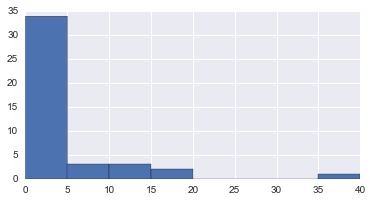

In [63]:
# distribution of claims from $0 to $10M
plt.hist(cat_explore('Claim_Amt.adj'), bins=8,range=(0,40))

In [94]:
df.groupby(['BORO.adj', 'Claim_Class']).max()

ClaimNo                          Claimant  \
BORO.adj      Claim_Class                                                   
BRONX         high         2016PI000234          ZAINO, ROCCO & MARY LYNN   
              low          2015PI035391                    WYDERKA, RALPH   
              medium       2014PI031306                    ZAPATA, CARLOS   
BROOKLYN      high         2016PI002285                  ZWITEK, WOJCIECH   
              low          2015PI032606  WINBORNE, STANLEY & SPANN VENGIE   
              medium       2015PI026775             SPONIAS, KONSTANTINOS   
MANHATTAN     high         2016PI000765                    WHARTON, LARRY   
              low          2015PI035095             WOLCSON, JOHN & TASHA   
              medium       2011PI041276       SIDOR, WALDEMAR & MAGDALENA   
Other         high         2014PI010293                    ZAKOTA, RAFAEL   
              low          2015PI006441             SERRA, THOMAS & ROBIN   
QUEENS        high         2016PI000320               WOJTALA, FRANCISZEK   
              low          2015PI028427                      YULFO, MARIA   
              medium       2015PI035962                SZYMANOWSKI, JERZY   
STATEN ISLAND high         2015PI030283                  ZALEWSKI, HENRYK   
              low          2015PI029674                     YOUNG, PHILIP   
              medium       2015PI015792             EARL, KENNETH & DONNA   

                                             Street1           Street2  \
BORO.adj      Claim_Class                                                
BRONX         high                       WHITLOCK AV    WESTCHESTER AV   
              low                     YANKEE STADIUM          W 238 ST   
              medium           ST ANNS AV & E 132 ST             PS 31   
BROOKLYN      high              VERRAZANO NARROWS BR            PS 798   
              low                    SURF AV & 37 ST        WATKINS AV   
              medium                       7002 4 AV            PS 164   
MANHATTAN     high                      WTC PATH STA               WTC   
              low                                WTC           WEST ST   
              medium                     55-01 94 ST             PS 13   
Other         high                        RIVER RD N      CROTON FALLS   
              low                          WALKER RD               NaN   
QUEENS        high             US TENNIS ASSOCIATION     UNION TP25000   
              low                      QUEENSBORO BR  ROOSEVELT ISLAND   
              medium                    93-11 101 AV             PS 70   
STATEN ISLAND high         STATEN ISL FERRY TERMINAL             PS 15   
              low               VERRAZANO NARROWS BR    TOTTENVILLE HS   
              medium                 91 HENDERSON AV            PS 373   

                           CLAIMED_AMOUNT  Year  Claim_Amt.1M  ClaimDate  \
BORO.adj      Claim_Class                                                  
BRONX         high           5.000000e+09  2015        5000.0 2015-11-13   
              low            5.500000e+06  2015           5.5 2015-09-27   
              medium         8.000000e+06  2014           8.0 2014-07-24   
BROOKLYN      high           1.000000e+08  2015         100.0 2015-10-20   
              low            5.500000e+06  2015           5.5 2015-09-25   
              medium         6.000000e+06  2015           6.0 2015-06-30   
MANHATTAN     high           5.000000e+07  2015          50.0 2015-12-17   
              low            5.500000e+06  2015           5.5 2015-10-22   
              medium         8.000000e+06  2011           8.0 2011-11-10   
Other         high           1.000000e+07  2014          10.0 2014-01-07   
              low            4.000000e+06  2014           4.0 2014-12-09   
QUEENS        high           5.000000e+09  2015        5000.0 2015-11-11   
              low            5.500000e+06  2015           5.5 2015-08-08   
              medium 

In [65]:
df.groupby(['Agency.adj', 'Claim_Class']).size()

Agency.adj                        Claim_Class
DEPT OF DESIGN AND CONSTRUCTION   high             6
                                  low             15
                                  medium           2
DEPT OF EDUCATION                 high            34
                                  low             47
                                  medium           9
DEPT OF ENVIRONMENTAL PROTECTION  high            26
                                  low             39
                                  medium           3
DEPT OF PARKS & RECREATION        high            12
                                  low             13
                                  medium           1
DEPT OF TRANSPORTATION            high            15
                                  low             25
NYC TRANSIT AUTHORITY             high            22
                                  low             16
Other                             high           148
                                  low            122


In [92]:
df.groupby(['Agency.adj', 'RIS.1']).size().sort_values()

Agency.adj                        RIS.1                          
DEPT OF DESIGN AND CONSTRUCTION   CITY BLDG - WALKS & GROUNDS          1
DEPT OF TRANSPORTATION            CITY BLDG - CIVIC/PUBLIC             1
NYC TRANSIT AUTHORITY             CITY BLDG - CIVIC/PUBLIC             1
DEPT OF PARKS & RECREATION        INJURED BY                           1
NYC TRANSIT AUTHORITY             CITY LOT/LAND                        1
DEPT OF ENVIRONMENTAL PROTECTION  UNKNOWN                              1
Other                             FLOOR/SURFACE - HOLE/DEPRESSION      1
NYC TRANSIT AUTHORITY             DEMOLITION                           1
Other                             CITY BLDG - CIVIC/PUBLIC             1
                                  COLLAPSE/STRUCTURAL FAILURE          1
DEPT OF EDUCATION                 CHEMICAL/GAS                         1
Other                             DEMOLITION                           1
                                  UNKNOWN                 

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

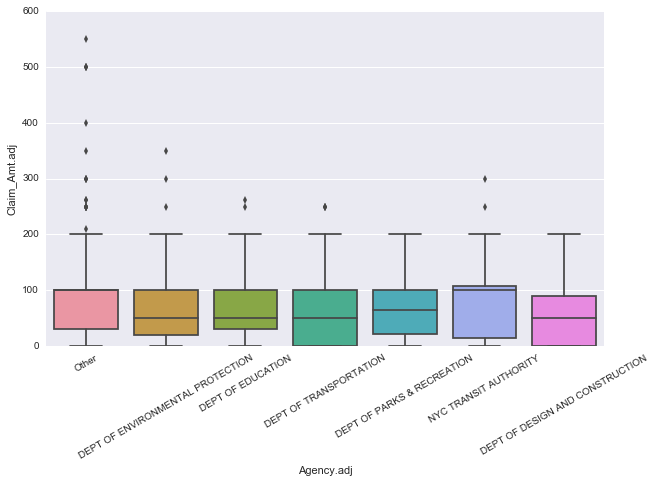

In [67]:
# box plot of claim by agency 
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x='Agency.adj', y='Claim_Amt.adj', data = df)
fig.axis(ymin=-0.5, ymax=600)
plt.xticks(rotation=30)

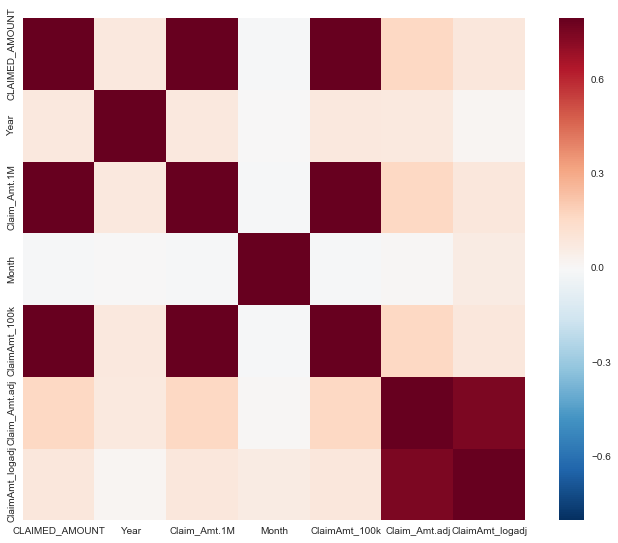

In [68]:
# correlation matrix
corrmat = df.corr()
r, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8, square=True)

In [69]:
# histogram and normal probability plot
#sns.distplot(df['Claim_Amt.adj']);
#fig = plt.figure()
#res = stats.probplot(df['Claim_Amt.adj'], plot = plt)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

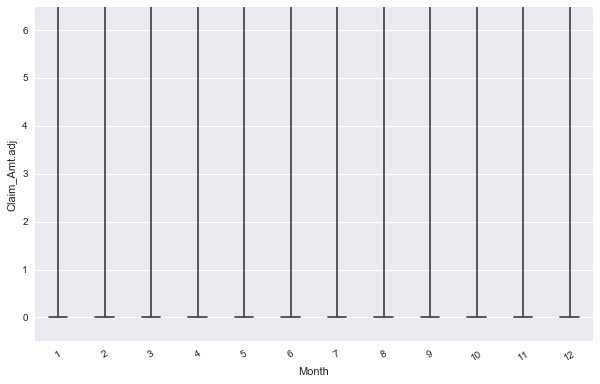

In [70]:
# claim by month
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x='Month', y='Claim_Amt.adj', data = df)
fig.axis(ymin=-0.5, ymax=6.5)
plt.xticks(rotation=30)

In [71]:
# create training and testing matricies
#dum_df.dtypes

In [72]:
# create dataset for Claim_Amt being not null indicating Claim is active/being pursued
claim_notnull=dum_df[dum_df['Claim_Amt.adj'].notnull()]

In [73]:
# create dataset for Claim_Amt being not null indicating Claim is not active or not yet filed
claim_null=dum_df[dum_df['Claim_Amt.adj'].isnull()]

In [74]:
# create training, testing split
from sklearn.cross_validation import train_test_split

/Users/owner/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [75]:
X_train, X_test = train_test_split(claim_notnull, test_size = 0.2)

In [76]:
y_train = X_train.pop('Claim_Amt.adj')

In [77]:
y_test = X_test.pop('Claim_Amt.adj')

In [78]:
#X_train.dtypes

In [79]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [80]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train.ix[:,'Year':], y_train, scoring=
                                   "neg_mean_squared_error", cv = 10))
    return(rmse)

In [81]:
# Ridge Model
model_ridge = Ridge()

In [82]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

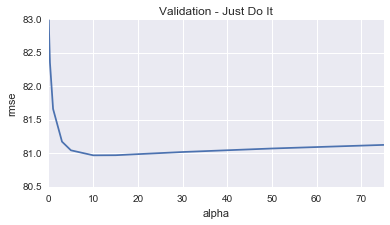

In [83]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [84]:
print "Ridge regression alpha score on training set: ",cv_ridge.min()

Ridge regression alpha score on training set:  80.9700479703


In [85]:
# Lasso Model
mod_lasso = LassoCV(alphas = [1,0.1,0.001,0.0005]).fit(X_train.ix[:,'Year':], y_train)

/Users/owner/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [86]:
print "Lasso regression alpha score on training set: ", rmse_cv(mod_lasso).mean()

Lasso regression alpha score on training set:  81.4054502068


In [87]:
# prediction of testing set
y_pred_train = mod_lasso.predict(X_train.ix[:,'Year':])

In [88]:
# use exponent if log the claim amount
y_pred_train = np.exp(y_pred_train)

In [89]:
y_pred_train

array([  5.76119743e+23,   2.88260544e+26,   1.08588390e+36,
         3.72615378e+32,   8.58368329e+36,   4.34158448e+31,
         5.89167501e+34,   1.22622598e+30,   3.54324246e+58,
         3.50591018e+43,   8.15202696e+30,   1.40105118e+35,
         5.94736744e+32,   3.72467617e+38,   2.04115844e+36,
         3.60969621e+37,   2.03981369e+25,   1.70145068e+43,
         1.37439027e+34,   1.19096951e+36,   3.76206804e+32,
         1.19175466e+47,   1.34862836e+51,   1.48816013e+27,
         1.56695940e+33,   8.15202696e+30,   4.84754219e+29,
         3.09403357e+32,   2.83198854e+34,   6.46175839e+39,
         1.13111522e+46,   6.64045920e+30,   2.45566025e+47,
         9.41597943e+43,   7.52880437e+37,   6.64045920e+30,
         6.72621044e+42,   1.61682652e+33,   1.92167991e+44,
         1.61487664e+42,   4.12684789e+39,   2.12647585e+37,
         5.20634992e+30,   2.69191719e+42,   2.17463553e+48,
         3.60969621e+37,   5.05665688e+36,   4.25025964e+33,
         3.50591018e+43,

In [90]:
pred_train = pd.concat(y_pred_train, index=X_train["ClaimNo"], columns=['Claim_Amt'])

TypeError: concat() got an unexpected keyword argument 'index'

In [ ]:
### figure out how to side by side compare pred_train to y_train

In [ ]:
df_target = pd.concat(y_pred_train['Claim_Amt'], df['ClaimAmt_100k'],axis=1, keys
                      =['pred_train', 'df'])
df_target.head()

In [ ]:
print y_pred_train.sort()
print df.ix[:,['ClaimNo','ClaimAmt_100k']]
#print X_train

In [ ]:
# Understand the Feature Importance
coef = pd.Series(mod_lasso.coef_, index=X_train.ix[:,'Year':].columns)

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [ ]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

In [ ]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [ ]:
# Get the residuals
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":mod_lasso.predict(X_train.ix[:,'Year':]), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")